# Mexico Territory Random Points #

In [1]:
from IPython.core.display import display, HTML
display(HTML("""<style>.container {width:95% !important} pre{font-size: 10px;}</style>"""))

In [2]:
from pyspark.sql.functions import expr
from rpolygonpoint.randompoint import RadomPoint
from rpolygonpoint.utils.spark import spark
from rpolygonpoint.utils.plot import plot_polygon, add_polygon, add_point
from rpolygonpoint.utils.plot import polygon_to_list, point_to_list

In [3]:
# Path to data and workspace
path_ws = "C:/D/engines/rpolygonpoint/rpolygonpoint/data/"

In [4]:
# Load data to Mexico polygon
df_mexico_polygon = spark.read.parquet(path_ws + "t_country_polygon")\
    .filter("country_id = 'MX' and polygon_id = 35")\
    .selectExpr(
        "polygon_id",
        "point_seq",
        "longitude_id as coord_x",
        "latitude_id as coord_y"
    )

df_mexico_polygon.show(5)

+----------+---------+-----------+----------------+
|polygon_id|point_seq|    coord_x|         coord_y|
+----------+---------+-----------+----------------+
|        35|      1.0|-113.052887|       31.971069|
|        35|      2.0|-112.867279|31.9134100000001|
|        35|      3.0|     -112.5|        31.79837|
|        35|      4.0|-112.299438|31.7355500000001|
|        35|      5.0|-111.946381|31.6236080000001|
+----------+---------+-----------+----------------+
only showing top 5 rows



In [5]:
# Generated Mexico polygon mesh
mexico_random_point = RadomPoint(df_mexico_polygon)

mexico_random_point.set_mesh_split(40) # Split mesh cells
mexico_random_point.set_mesh_level(1) # Iterations number to split mesh cells
mexico_random_point.set_earned_prop(0.1) # earned rate to continue split
mexico_random_point.set_path_data(path_ws + "mx_territory_randompoint/")

mexico_random_point.get_polygon_mesh()
mexico_random_point.get_aceptation_rate()

# mexico_random_point.load_polygon_mesh() # Load preprocesor to polygon container
# mexico_random_point.load_aceptation_rate() # load preprocesor to aceptation rate

[2022-01-02 02:53:59.014785] - [INFO] - [write_persist] :: Write DataFrame to C:/D/engines/rpolygonpoint/rpolygonpoint/data/mx_territory_randompoint/t_rpp_delimiter_rectangle: WriteMode overwrite!
[2022-01-02 02:54:02.324934] - [INFO] - [write_persist] :: Persist DataFrame EndPolygonPoint with 3,383 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-02 02:54:02.324934] - [INFO] - [get_polygon_side] :: side end point
[2022-01-02 02:54:03.978514] - [INFO] - [write_persist] :: Write DataFrame to C:/D/engines/rpolygonpoint/rpolygonpoint/data/mx_territory_randompoint/t_rpp_polygon_side: WriteMode overwrite!
[2022-01-02 02:54:04.011427] - [INFO] - [unpersist] :: Unpersist DataFrame EndPolygonPoint!
[2022-01-02 02:54:04.012424] - [INFO] - [get_polygon_side] :: polygon sides
[2022-01-02 02:54:06.379096] - [INFO] - [write_persist] :: Persist DataFrame PolygonMesh with 6,400 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-02 02:54:06.379096] - [INFO] - [get_polygon_mesh2] :: p

In [10]:
df_mexico_sample = mexico_random_point.sample(size=100000)
df_mexico_sample.show(5)

[2022-01-02 02:55:00.335212] - [INFO] - [write_persist] :: Persist DataFrame Cell-RandomPoint with 125,625 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-02 02:55:00.964528] - [INFO] - [write_persist] :: Persist DataFrame ContainerRectangle with 125,625 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-02 02:55:00.964528] - [INFO] - [get_container_rectangle] :: container rectangle
[2022-01-02 02:55:01.510069] - [INFO] - [write_persist] :: Persist DataFrame PolygonDelimietRectangle with 625 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-02 02:55:02.875420] - [INFO] - [write_persist] :: Persist DataFrame ContainerRectangle with 125,625 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-02 02:55:02.875420] - [INFO] - [get_container_rectangle] :: container rectangle
[2022-01-02 02:55:08.751708] - [INFO] - [write_persist] :: Persist DataFrame ContainerPolygon with 24,909 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-02 02:55:08.752706] -

In [11]:
lst_mexico_polygon = polygon_to_list(df_mexico_polygon)

lst_mexico_cells = polygon_to_list(df_polygon=mexico_random_point.df_polygon_mesh, polygon_id=["polygon_id", "cell_id"])

lst_mexixo_sample = point_to_list(df_mexico_sample)

(<AxesSubplot:title={'center':'Mexico Territory Random Point (100,000)'}, xlabel='coord x', ylabel='coord y'>,
 <Figure size 7200x7200 with 1 Axes>)

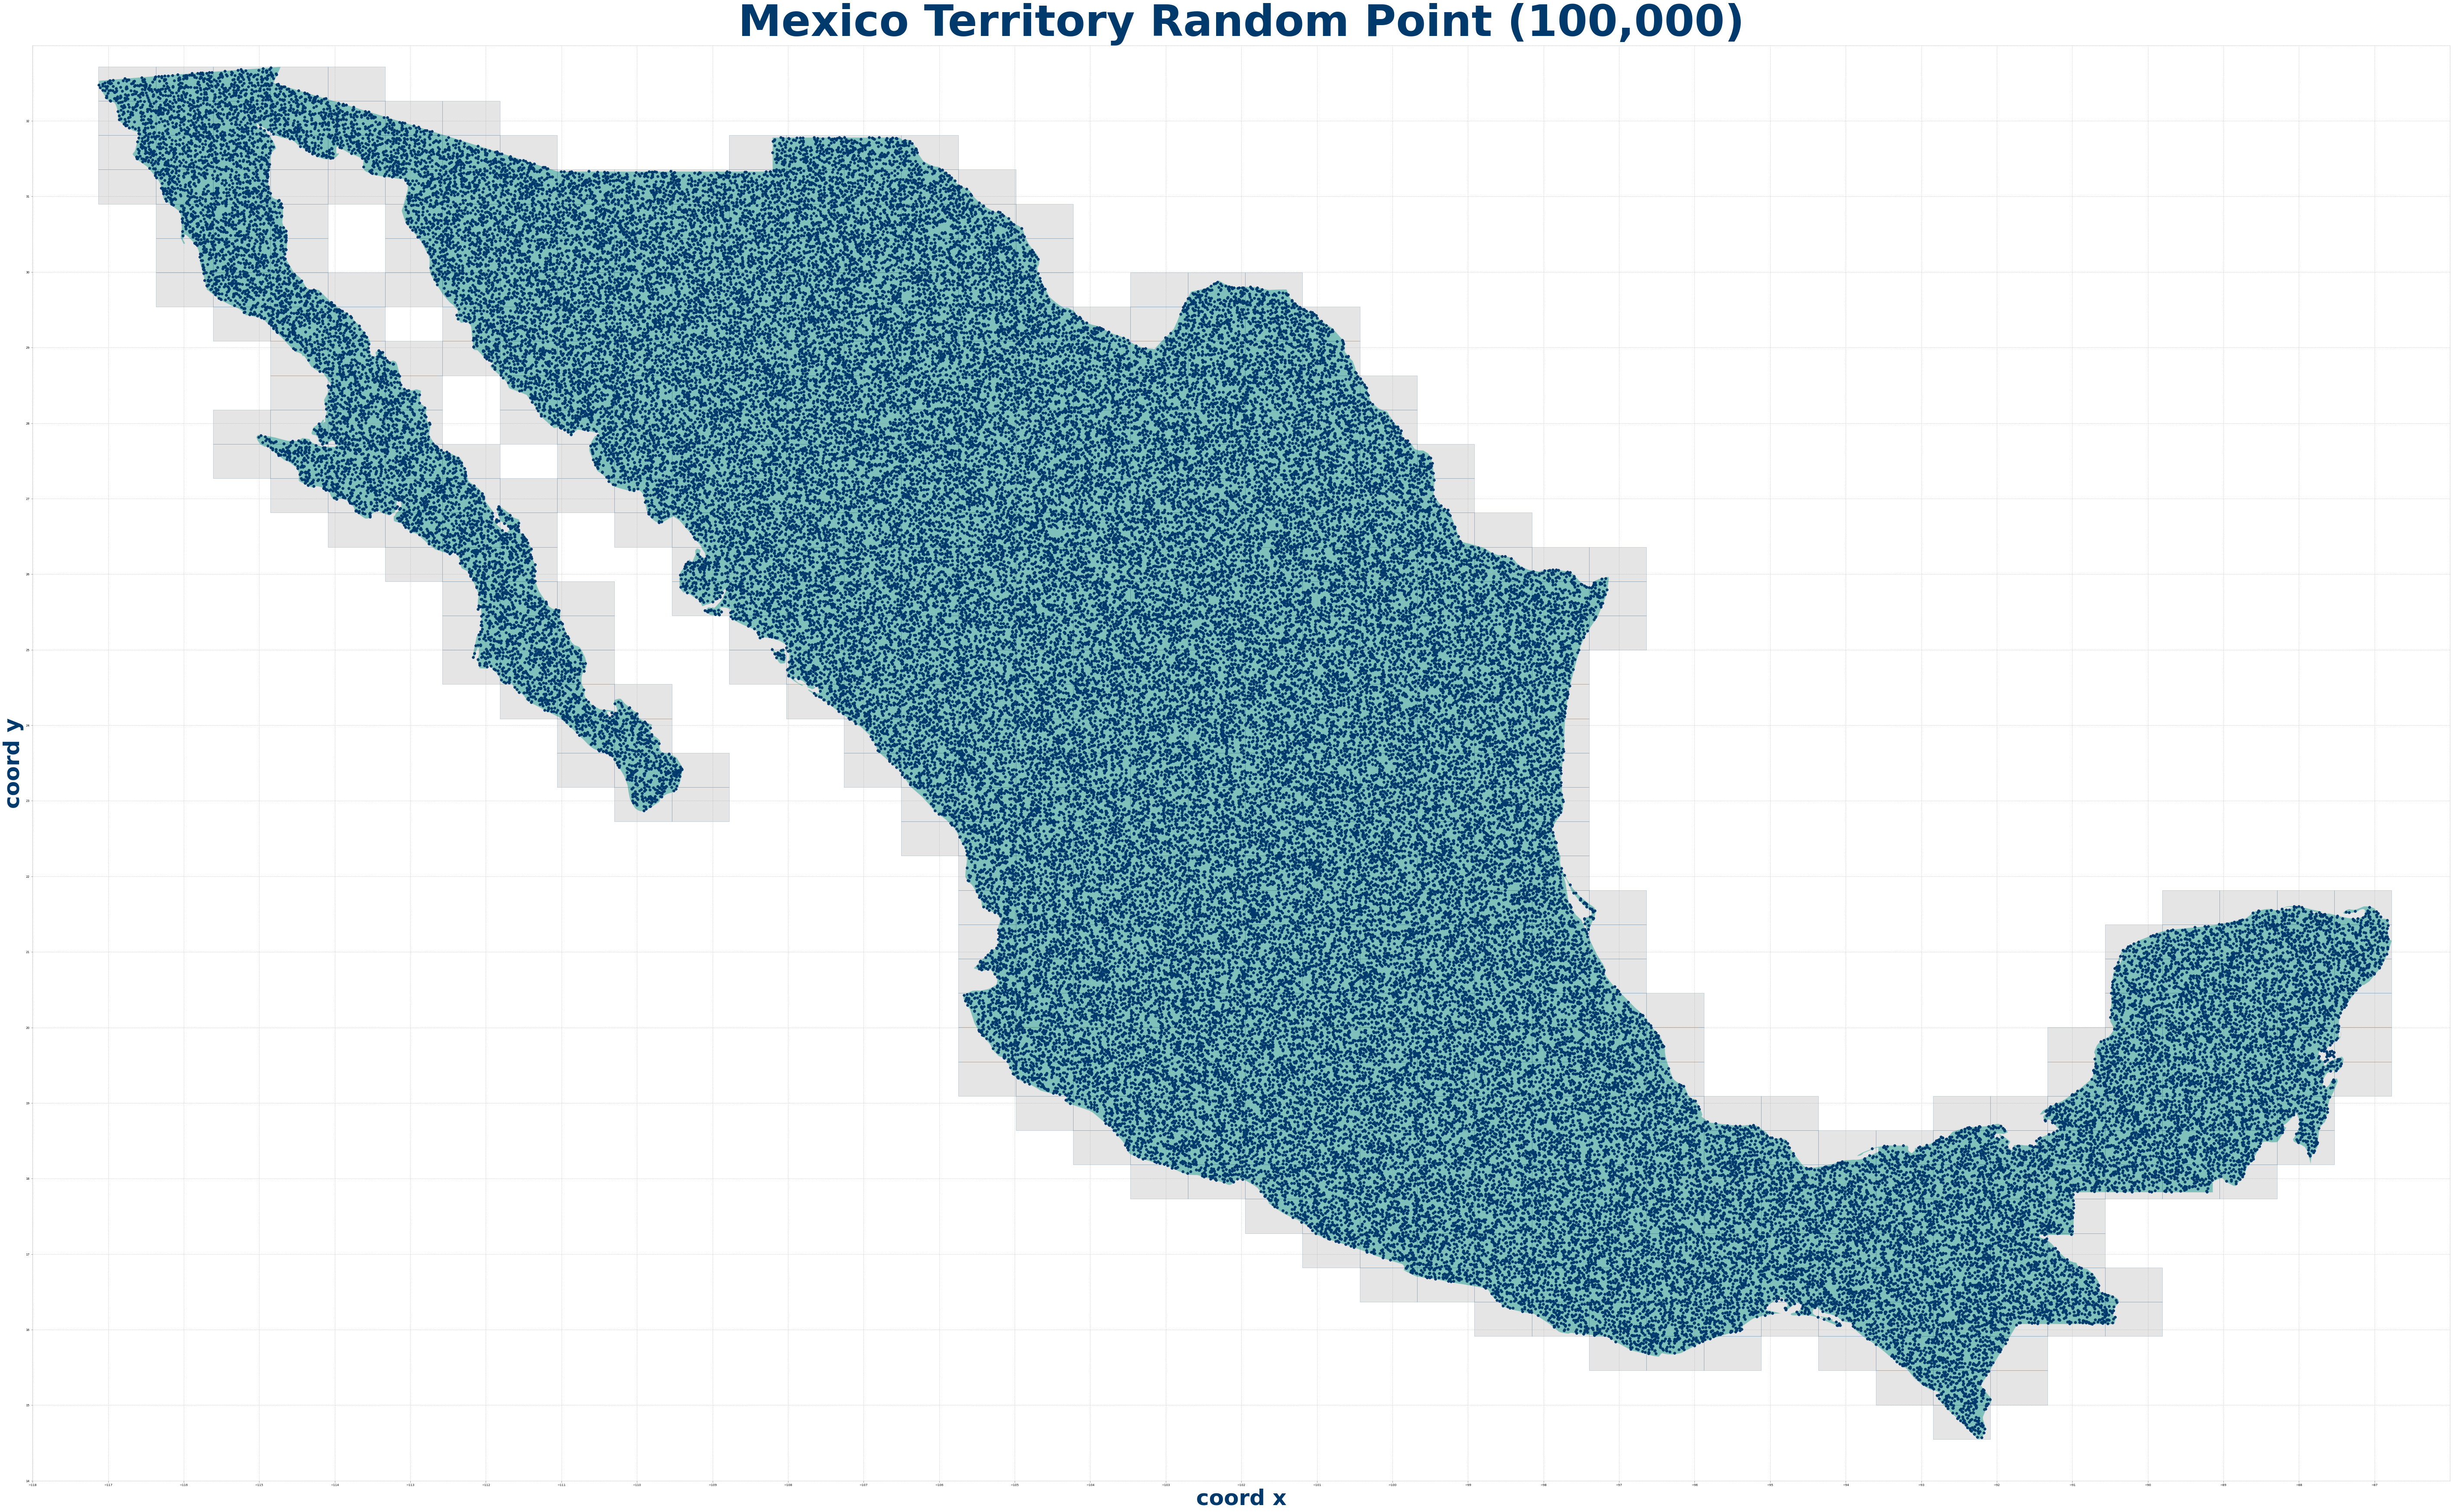

In [13]:
fig = plot_polygon(lst_mexico_polygon, tick=1, title="Mexico Territory Random Point (100,000)",  figsize=(100, 100), alpha=0.5, fontsize=5)

add_polygon(fig, lst_mexico_cells, color="gray", alpha=0.2, border_color="#00396C")
add_point(fig, lst_mexixo_sample, color="#00396C", size=0.5)

In [14]:
spark.catalog.clearCache()